In [3]:
# declare the imports for building our neural network and displaying our data 
import tensorflow as tf
import PIL
import os
import h5py
import sys
import numpy as np
import pandas as pd
import random
import csv
import cv2
import fnmatch
from shutil import copyfile
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from numpy import asarray
from numpy import savetxt
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Activation
from keras.utils import np_utils
from matplotlib import image
from os import listdir

# set the input and outpout Dirs
data_dir = 'C:\\Users\davie\Desktop\Final_Project\FYP\HCurve'
Output = 'C:\\Users\davie\Desktop\Final_Project\FYP\Processed_Data\\'

# create lists for the labels and the images 
loaded_images = []
labels = []

# function to find the the different Dirs withing the dataset 
def find_dirs(directory, pattern):
    for item in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, item)):
            if fnmatch.fnmatch(item, pattern):
                filename = os.path.join(directory, item)
                yield filename

# function to find all the files in a given Dir 
def find_files(directory, pattern):
    for item in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, item)):
            if fnmatch.fnmatch(item, pattern):
                filename = os.path.join(directory, item)
                # assign a numerical value in place of a name
                if 'ABDMJ' in directory: labels.append(0)
                elif  'Agen' in directory: labels.append(1)# changes from Agent.BDJM for labeling reasons
                elif  'Allaple'  in directory: labels.append(2)
                elif  'Autoit'  in directory: labels.append(3)
                elif  'Berbew'  in directory: labels.append(4)
                elif  'Bitman'  in directory: labels.append(5)
                elif  'Dinwod' in directory: labels.append(6)
                elif  'Dorkbot'  in directory: labels.append(7)
                elif  'Dridex'  in directory: labels.append(8)
                elif  'Emotet'  in directory: labels.append(9)
                elif  'Fsysna'  in directory: labels.append(10)
                elif  'Hematite'  in directory: labels.append(11)
                elif  'InstallMonster'  in directory: labels.append(12)
                elif  'Oberal'  in directory: labels.append(13)
                elif  'Picsys'  in directory: labels.append(14)
                elif  'Salgorea'  in directory: labels.append(15)
                elif  'Scar'  in directory: labels.append(16)
                elif  'Sfone'  in directory: labels.append(17)
                elif  'Shifu'  in directory: labels.append(18)
                elif  'Socks'  in directory: labels.append(19)
                elif  'Sytro'  in directory: labels.append(20)
                elif  'Vilsel'  in directory: labels.append(21)
                elif  'Vobfus' in directory : labels.append(22)
                yield filename

In [4]:
# loop while there are Dirs and files in a given path 
runtime = True
while runtime == True:
    for filedir in find_dirs(data_dir, '*'):
            for filename in find_files(filedir, '*'):              
                img_data = cv2.imread(filename) 
                loaded_images.append(img_data)
    print("Done")
    runtime = False;

Done


In [5]:
# Output img with window name as 'image' for testing of inmages loading 
cv2.imshow('image', loaded_images[0])
cv2.waitKey(0)        
cv2.destroyAllWindows()

In [6]:
# convert the lists to arrays in ordfer to split the data  
imsARR = np.array(loaded_images)
labsARR = np.array(labels)

In [7]:
# split the data intop training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(imsARR, labsARR)

In [8]:
# examione the shape of the data 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(9818, 256, 256, 3)
(3273, 256, 256, 3)
(9818,)
(3273,)


In [9]:
# building the input vector from the 256x256 pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [10]:
# one-hot encoding using keras
n_classes = 23
class_names = ['ABDMJ', 'Agen', 'Allaple', 'Autoit', 'Berbew', 'Bitman', 'Dinwod', 'Dorkbot', 
               'Dridex', 'Emotet', 'Fsysna', 'Hematite', 'InstallMonster', 'Oberal', 'Picsys', 
               'Salgorea', 'Scar', 'Sfone', 'Shifu', 'Socks', 'Sytro', 'Vilsel', 'Vobfus']
print("Shape before one-hot encoding: ", Y_train.shape)
Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (9818,)
Shape after one-hot encoding:  (9818, 23)


In [11]:
# building a linear stack of layers with the sequential model
model = Sequential()

In [12]:
# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(256, 256, 3)))
# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# convolutional layer
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# convolutional layer
model.add(Conv2D(150, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# convolutional layer
model.add(Conv2D(175, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [14]:
# flatten output
model.add(Flatten())
# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(125, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(23, activation='softmax'))

In [15]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs with a batch size e of 50 as there are memory constraints 
history = model.fit(X_train, Y_train, batch_size=50, epochs=10, validation_data=(X_test, Y_test))
# training the model for 15 epochs with a batch size e of 30 as there are memory constraints and tweeking the params
# history = model.fit(X_train, Y_train, batch_size=30, epochs=15, validation_data=(X_test, Y_test))


model.summary()

Epoch 1/10
197/197 [==============================] - 20422s 103s/step - loss: 3.0792 - accuracy: 0.0871 - val_loss: 2.6622 - val_accuracy: 0.1460
Epoch 2/10
197/197 [==============================] - 18472s 94s/step - loss: 2.1786 - accuracy: 0.3053 - val_loss: 0.6917 - val_accuracy: 0.7886
Epoch 3/10
197/197 [==============================] - 18953s 96s/step - loss: 0.8109 - accuracy: 0.7534 - val_loss: 0.3112 - val_accuracy: 0.9157
Epoch 4/10
197/197 [==============================] - 18630s 95s/step - loss: 0.3896 - accuracy: 0.8892 - val_loss: 0.2333 - val_accuracy: 0.9447
Epoch 5/10
197/197 [==============================] - 19075s 97s/step - loss: 0.2752 - accuracy: 0.9247 - val_loss: 0.2242 - val_accuracy: 0.9496
Epoch 6/10
197/197 [==============================] - 18538s 94s/step - loss: 0.2040 - accuracy: 0.9429 - val_loss: 0.1879 - val_accuracy: 0.9572
Epoch 7/10
197/197 [==============================] - 18517s 94s/step - loss: 0.1655 - accuracy: 0.9551 - val_loss: 0.1634 

In [ ]:
# evaluate the model and print the score to screen 
trainingscores = model.evaluate(X_train, Y_train, verbose=0)
testingscores = model.evaluate(X_test, Y_test, verbose=0)
print("[INFO] evaluating network")
predictions = model.predict(X_test, batch_size=50)
print("training scores are below \n")
print("%s: %.2f%%" % (model.metrics_names[1], trainingscores[1]*100))
print("testing scores are below \n")
print("%s: %.2f%%" % (model.metrics_names[1], testingscores[1]*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=class_names))


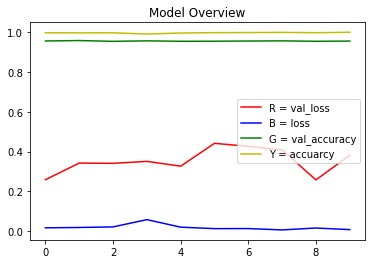

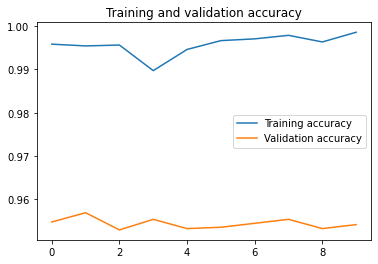

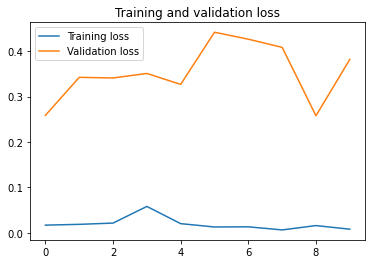

In [44]:
# Declare vars for the plotting of figures 
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(len(accuracy))

# overall model scoreing 
plt.plot(val_loss, 'r', loss, 'b', val_accuracy, 'g', accuracy, 'y')
label = 'R = val_loss', 'B = loss', 'G = val_accuracy', 'Y = accuarcy'
plt.title('Model Overview')
plt.legend(label)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.show()

# Training output 
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.show()

# testing output 
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.show()

In [ ]:
plt.style.use("ggplot")
#plt.figure()
plt.plot(np.arange(0, 100), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [32]:
model.save(Output + "modelReFIT2.h5")
print("Saved model to disk")

Saved model to disk
